<h1 style="color:darkblue;">PCA - Teoría</h1>

### Introducción
El análisis de componentes principales es una técnica de reducción de dimensionalidad en la cual se toma una matriz de datos y se busca generar una nueva mátriz en la cual se hallen aquellos componentes, ordenados de mayor a menor, que expliquen el máximo de varianza de los datos.

### Algoritmo
La idea intuitiva detrás del algoritmo es bastante simple:
- Primeramente, se toma una matriz de datos $D_{m\times n}$ que tiene $m$ instanscias en $\mathbb{R}^n$
- Se le resta la media de cada columna a $D$, por lo que se obtiene $D'$ correspondiente a los datos centrados
- Se obtiene a matriz de covarianza de $D'$, $\Sigma =$ cov($D'$)
- Se calculan los autovalores de $\Sigma$ de tal manera que $eig(\Sigma) = \{ \Sigma_1, \Sigma_2,...\Sigma_n \}$ se agrupan de mayor a menor segun el orden dado por el autovalor de cada autovector.

### Ejemplo
nota: los datos corresponden a diversos indicadores de países, pero para el ejemplo no es necesario conocerlos.

In [1]:
import matplotlib.pyplot as plt
import scipy.linalg as la
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Datos
D = pd.read_excel("Datasets/paises_mundo.xlsx")
D.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1.0,30,41,2199,3903,12,94,53,0.0,341,1.2
1,3.0,124,46,4422,955,6,57,19,0.7,89,0.5
2,4.3,21,13,133540,91019,96,497,1,0.0,4566,13.1
3,2.5,34,24,44609,19883,42,180,2,0.8,906,3.0
4,1.3,22,31,278431,65962,160,1043,22,0.1,1504,3.5


In [5]:
#datos centrados - Dp = D' --> "D prima"
Dp = D - D.mean()
Dp.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,-0.870833,-9.0625,3.71875,-114388.416667,-65358.322917,-153.125,-415.84375,25.666667,-0.553125,-1513.427083,-3.354167
1,1.129167,84.9375,8.71875,-112165.416667,-68306.322917,-159.125,-452.84375,-8.333333,0.146875,-1765.427083,-4.054167
2,2.429167,-18.0625,-24.28125,16952.583333,21757.677083,-69.125,-12.84375,-26.333333,-0.553125,2711.572917,8.545833
3,0.629167,-5.0625,-13.28125,-71978.416667,-49378.322917,-123.125,-329.84375,-25.333333,0.246875,-948.427083,-1.554167
4,-0.570833,-17.0625,-6.28125,161843.583333,-3299.322917,-5.125,533.15625,-5.333333,-0.453125,-350.427083,-1.054167


In [6]:
#Matriz de Covarianza
Sigma = Dp.cov() 

In [9]:
#Autovalores y Autovectores
eigvals, eigvecs = la.eig(Sigma)

In [11]:
#Auto vectores y datos centrados 
t_eigvecs = eigvecs.T
t_Dp = Dp.T

In [14]:
#Componentes principales
pca = t_eigvecs.dot(t_Dp)
pca = pca.T

In [17]:
#Tabla de PCA
cols = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11"]
PCA = pd.DataFrame(data=pca, columns=cols)

In [18]:
#Proporcion de varianza explicada
prop_var = PCA.var() / sum(PCA.var())
print(round(prop_var,5))

P1     0.90345
P2     0.09647
P3     0.00007
P4     0.00000
P5     0.00000
P6     0.00000
P7     0.00000
P8     0.00000
P9     0.00000
P10    0.00000
P11    0.00000
dtype: float64


> En este caso el primer componente explica el 90% de la varianza y el segundo el 9.65%

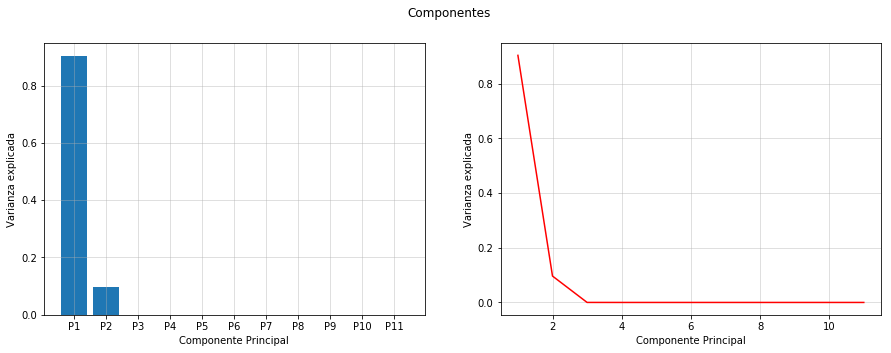

In [22]:
plt.figure(figsize=(15,5))
plt.suptitle("Componentes")

plt.subplot(121)
plt.bar(cols,prop_var)
plt.xlabel("Componente Principal")
plt.ylabel("Varianza explicada")
plt.grid(alpha=0.5)

plt.subplot(122)
plt.plot(np.linspace(1,11,11), prop_var, color="red")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza explicada")
plt.grid(alpha=0.5)

In [25]:
#proporcion de varianza acumulada
cum_var = prop_var.cumsum()
cum_var

P1     0.903454
P2     0.999927
P3     0.999995
P4     1.000000
P5     1.000000
P6     1.000000
P7     1.000000
P8     1.000000
P9     1.000000
P10    1.000000
P11    1.000000
dtype: float64

In [28]:
#PCA con sklearn
from sklearn.decomposition import PCA as skPCA

In [30]:
sk_pca = skPCA(n_components=11).fit(D)

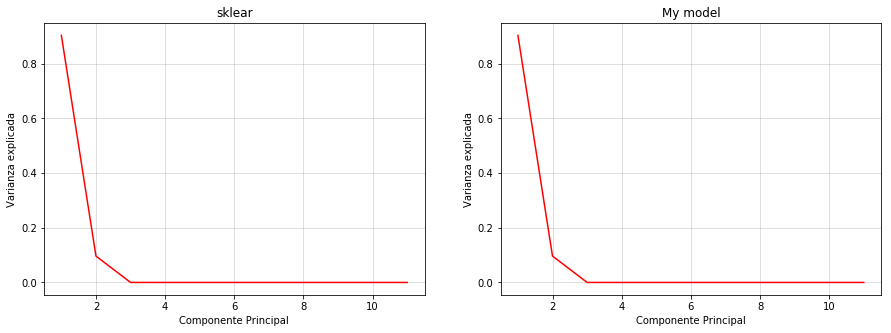

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(np.linspace(1,11,11), sk_pca.explained_variance_ratio_, color="red")
plt.title("sklear")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza explicada")
plt.grid(alpha=0.5)

plt.subplot(122)
plt.plot(np.linspace(1,11,11), prop_var, color="red")
plt.title("My model")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza explicada")
plt.grid(alpha=0.5)

In [37]:
#Diferencia entre los calculos paso a paso y sklearn
error = sk_pca.explained_variance_ratio_ - prop_var
print(round(error,6))

P1     0.0
P2     0.0
P3    -0.0
P4     0.0
P5     0.0
P6    -0.0
P7    -0.0
P8    -0.0
P9     0.0
P10    0.0
P11   -0.0
dtype: float64


> Finalmente, el modelo casi desde cero en Python resultó bastante similar al modelo de sklearn

###### Fuentes:
- Amat Rodrigo (2017) Análisis de Componentes Principales (Principal Component Analysis, PCA) y t-SNE. Extraído el 09 de septiembre 2020 de: https://www.cienciadedatos.net/documentos/35_principal_component_analysis
- Baillo Moreno & Grane Chavez (2008) 100 problemas de estadistica multivariante (Implementados en Matlab). Delta, Publicaciones Universitarias. Primera Edición. Madrid España. 
- VanderPlas J. (s.f.) In Depth: Principal Component Analysis.  Python Data Science Handbook. Extraído el 09 de septiembre 2020 de: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- UnADM (s.f.) Unidad 2 Minería de Datos. Computación II. Universidad Abierta y a Distancia de México. Clave 05142423/06142423